# FIFA 20 Player Rating Prediction

The goal of this project is to predict the rating of a player on FIFA20 based off of their stats.

In [1]:
# Importing important libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# To ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Making graphs look nice for the theme I'm using
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

# Importing the dataset - which I got from kaggle
file = '/Users/patrickfahy99/Documents/Kaggle_datasets/players_20.csv'

# Create a dataframe with this data
df = pd.read_csv(file)

# See all columns of the dataframe, and print the first 5 rows
pd.options.display.max_columns = None
df.head()

/Users/patrickfahy99/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,NaN,2004-07-01,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2018-07-10,2022.0,LS,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,195200000.0,"#Speedster, #Dribbler, #Playmaker , #Crosser,...",CAM,10.0,NaN,2017-08-03,2022.0,LW,10.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,Normal,Yes,164700000.0,NaN,GK,13.0,NaN,2014-07-16,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,"Flair, Acrobatic Clearance",13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,4,4,4,High/Medium,Normal,Yes,184500000.0,"#Speedster, #Dribbler, #Acrobat",LW,7.0,NaN,2019-07-01,

## Data Cleaning

In [2]:
# Get the columns only needed for prediction by removing the others
del [df['sofifa_id'], df['overall'], df['team_position'], df['player_positions'], df['age'],
df['player_url'], df['short_name'], df['long_name'], df['dob'], df['nationality'],
df['club'], df['potential'], df['value_eur'], df['wage_eur'], df['preferred_foot'],
df['work_rate'], df['body_type'], df['real_face'], df['release_clause_eur'],
df['player_tags'], df['team_jersey_number'], df['loaned_from'], df['joined'], 
df['contract_valid_until'], df['nation_position'], df['nation_jersey_number'],
df['player_traits']]

In [3]:
# Let's focus on only one position, let's say ST - striker, let's remove the others
del [df['ls'], df['rs'], df['lw'], df['lf'], df['cf'], df['rf'], df['rw'], df['lam'],
df['cam'], df['ram'], df['lm'], df['lcm'], df['cm'], df['rcm'], df['rm'], df['lwb'],
df['ldm'], df['cdm'], df['rdm'], df['rwb'], df['lb'], df['lcb'], df['cb'], df['rcb'],
df['rb']]

In [4]:
# Let's view the dataframe again
df.head()

,height_cm,weight_kg,international_reputation,weak_foot,skill_moves,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,st
0,170,72,5,4,4,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2
1,187,83,5,4,5,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3
2,175,68,5,5,5,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3
3,188,87,3,3,1,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,NaN
4,175,74,4,4,4,91.0,83.0,86.0,94.0,35.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,11,12,6,8,8,83+3


In [5]:
# pace, shooting, passing, dribbling, defending, physic, gk_diving, gk_handling etc... 
# are just combinations of the other attributes, so I will remove these.
del [df['pace'], df['shooting'], df['dribbling'], df['passing'], df['defending'], df['physic'],
df['gk_diving'], df['gk_handling'], df['gk_kicking'], df['gk_reflexes'], df['gk_speed'],
df['gk_positioning']]

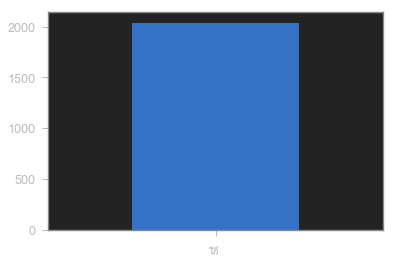

In [6]:
# Look at which columns have null values
missing = df.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

In [7]:
# Look at rows with a null value
df[df.isna().any(axis=1)]

,height_cm,weight_kg,international_reputation,weak_foot,skill_moves,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,st
3,188,87,3,3,1,13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,NaN
6,187,85,3,4,1,18,14,11,61,14,21,18,12,63,30,38,50,37,86,43,66,79,35,78,10,43,22,11,70,25,70,25,13,10,88,85,88,88,90,NaN
13,191,91,3,3,1,17,13,19,45,20,27,19,18,44,30,56,47,40,88,37,64,52,32,78,14,27,11,13,66,23,65,15,19,16,85,84,85,90,89,NaN
14,192,82,4,3,1,17,13,21,50,13,18,21,19,47,38,57,58,63,87,43,61,67,43,60,12,38,30,12,65,29,68,25,21,13,90,84,81,85,92,NaN
25,188,86,2,3,1,20,14,14,56,18,23,15,20,58,40,64,63,60,87,48,70,66,41,68,18,38,27,20,70,17,70,29,15,8,86,82,93,86,88,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18231,188,81,1,1,1,12,5,13,12,7,14,13,11,17,18,15,20,27,31,37,41,48,28,56,8,24,12,4,27,15,32,5,13,12,53,47,55,48,53,NaN
18239,185,65,1,2,1,11,6,13,21,9,8,14,13,18,12,29,31,24,28,31,36,42,16,44,5,17,11,4,26,14,22,8,14,11,50,50,48,49,51,NaN
18251,182,78,1,3,1,13,10,15,35,10,25,19,11,29,20,31,32,28,47,27,34,52,16,38,8,21,8,5,31,18,25,10,13,12,44,46,45,48,51,NaN
18259,185,71,1,2,1,10,7,11,19,7,10,13,10,18,12,27,22,33,28,31,36,43,18,38,6,18,9,6,21,14,20,8,10,10,50,49,48,47,51,NaN


In [8]:
# Remove rows with a null value
df = df[df['st'].notna()]
df = df.reset_index(drop=True)

In [9]:
# Check if all null values are gone
df.isnull().any().sum()

0

In [10]:
# Have a look at the dataframe again
df.head()

,height_cm,weight_kg,international_reputation,weak_foot,skill_moves,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,st
0,170,72,5,4,4,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2
1,187,83,5,4,5,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3
2,175,68,5,5,5,87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3
3,175,74,4,4,4,81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,11,12,6,8,8,83+3
4,181,70,4,5,4,93,82,55,92,82,86,85,83,91,91,77,76,78,91,76,91,63,89,74,90,76,61,88,94,79,91,68,58,51,15,13,5,10,13,82+3


In [11]:
# We see the st row's entries are of the form x+y, instead of z. Let's fix this
df['st_added'] = df['st'].apply(lambda x: int(x.split('+')[1]))
df['st_base'] = df['st'].apply(lambda x: int(x.split('+')[0]))
df['st'] = df['st'].apply(lambda x: sum([int(i) for i in (x.split('+'))]))

We see there are two parts to the overall rating.

I will first fit a machine learning model to predict the base rating, and then another to predict the amount added on.

## Machine Learning Time :)

In [12]:
# Import machine learning libraries

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso

In [13]:
# Create train and test sets
y = df['st_base']
X = df.drop(['st', 'st_base', 'st_added'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [14]:
# Fitting a linear regression model

regressor = Lasso(alpha=0.02, precompute=True,max_iter=10000,
            positive=True, random_state=42, selection='random')
regressor.fit(X_train,y_train)
train = regressor.predict(X_train)

In [15]:
# Create a metric for evaluating the model
def output_accuracy(y_real, y_pred):
    sum = 0
    for y,x in zip(y_real, y_pred):
        sum += abs(y - np.rint(x))
    accuracy = 1 - sum / len(y_real)
    return '{:.2f}% accurate'.format(100 *float(accuracy))

In [16]:
output_accuracy(y_train, train)

'99.42% accurate'

In [17]:
# See the most important features
for i,j in zip(regressor.coef_, X.columns):
    if i >= 0.01:
        print(round(i,2),j)

0.18 attacking_finishing
0.1 attacking_heading_accuracy
0.05 attacking_short_passing
0.02 attacking_volleys
0.07 skill_dribbling
0.1 skill_ball_control
0.04 movement_acceleration
0.05 movement_sprint_speed
0.08 movement_reactions
0.1 power_shot_power
0.05 power_strength
0.03 power_long_shots
0.13 mentality_positioning


In [18]:
# Now let's predict how much rating gets added on
X_add = df[['st_base', 'international_reputation']]
y_add = df['st_added']

In [19]:
# Creating new train and test sets 
X_atrain, X_atest, y_atrain, y_atest = train_test_split(X_add, y_add, test_size=0.1, random_state=42)

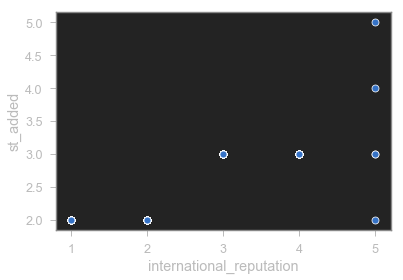

In [20]:
# Looking at the relationship between the international reputation and the number added
sns.scatterplot(df['international_reputation'], df['st_added'])

In [21]:
# Looks like we need to use a tree based model 
from sklearn.tree import DecisionTreeClassifier

In [22]:
# Fitting the model
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_atrain, y_atrain)

DecisionTreeClassifier(random_state=42)

In [23]:
output_accuracy(clf.predict(X_atrain), y_atrain)

'100.00% accurate'

In [24]:
# Creating a function to perform the two parts to my model
def model(df):
    base = np.rint(regressor.predict(df.drop(['st', 'st_base', 'st_added'], axis=1)))
    new_df = pd.DataFrame({'st_base': base, 
                           'international_reputation': df['international_reputation'].values}, 
                           columns=['st_base', 'international_reputation'])
    add = clf.predict(new_df)
    rating = base+add
    
    return rating

In [25]:
output_accuracy(model(df), df['st'])

'99.41% accurate'

Not too shabby! Let's visualise this

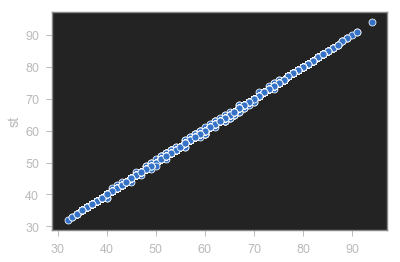

In [26]:
sns.scatterplot(model(df), df['st'])